# 水蒸気ライダー(WVL)とLFMのQVの鉛直プロファイルを比較する図
事前に、以下のスクリプトを実行し、ある１地点での水蒸気の鉛直プロファイルを出力しておくこと。
* draw_vaporlidar_multi_qv_z-t.ipynb => 'wvl_Ko.nc'
* draw_4v-lfm_multi_qv_z-t.ipynb     => 'lfm_Ko_FT1.nc'
                                     => 'lfm_Ko_FT0.nc'

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import xarray as XR
import sys # to get argv
import os
import warnings
warnings.filterwarnings('ignore')

In [94]:
#---読み込むデータの設定-------
#argvs = sys.argv
#nc =  argvs[1] 
#nc = '../data/'
lidar = 'Ko'
lidar = 'Na'

a_th = 10

nc1 = f'wvl_{lidar}.nc'
#nc1 = f'wvl{a_th}_{lidar}.nc'
nc2 = f'lfm_{lidar}_FT1.nc'
nc0 = f'lfm_{lidar}_FT0.nc'

it = 0    # 時刻スライス(0:解析値, >=1:予測値)
it = 1    # 時刻スライス(0:解析値, >=1:予測値)
#x = 129.789176; y = 31.778707 # 下甑島WVL
zmin = 0; zmax = 2 # 可視化範囲
#t1 = "2021-07-09T2350"; t2 = "2021-07-10T0000"
t1 = "2021-07-09T2345"; t2 = "2021-07-09T2355";  t2_lfm = "2021-07-10T0000" 
#tt1 = pd.to_datetime(t1)
#tt2 = pd.to_datetime(t2)

In [95]:
#--- データの読み込み------------------
#xr  = XR.open_dataset(nc).sel(LON=slice(xmin,xmax)).sel(LAT=slice(ymin,ymax))

xr0  = XR.open_dataset(nc0)
xr1  = XR.open_dataset(nc1)
xr2  = XR.open_dataset(nc2)

xr2_i = xr2.interp_like(xr1)

qv0 = xr0["QV"]
qv1 = xr1["QV"]
qv2 = xr2["QV"]
qv2_i = xr2_i["QV"]
xr1
#nc2

<xarray.Dataset>
Dimensions:  (TIME: 37, LEV: 71)
Coordinates:
  * TIME     (TIME) datetime64[ns] 2021-07-09T18:07:30 ... 2021-07-10T03:07:30
  * LEV      (LEV) float64 0.1904 0.2653 0.3403 0.4152 ... 9.521 9.671 9.821
Data variables:
    QV       (TIME, LEV) float64 ...

In [96]:
#qv2_i = qv2.interp(LEV=qv1["LEV"])
qv_diff = qv1 - qv2_i
#qv_diff
#qv_diff.plot()

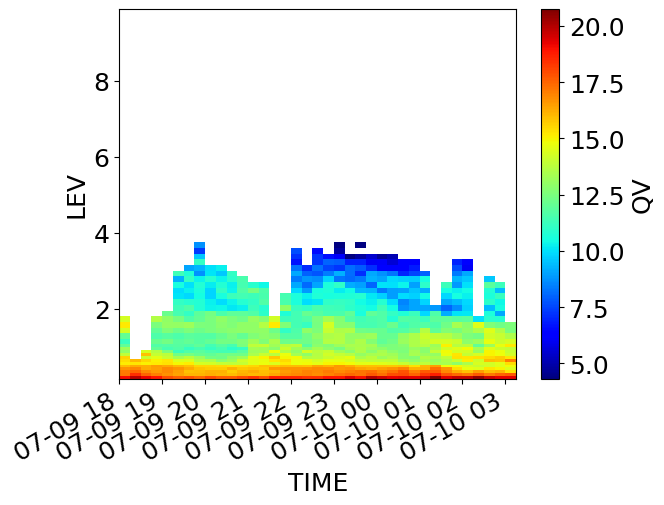

In [97]:
# 確認描画
#qv1.plot()
#qv2.plot()
cmap = "jet"
qv1.transpose("LEV", "TIME").plot(cmap=cmap)


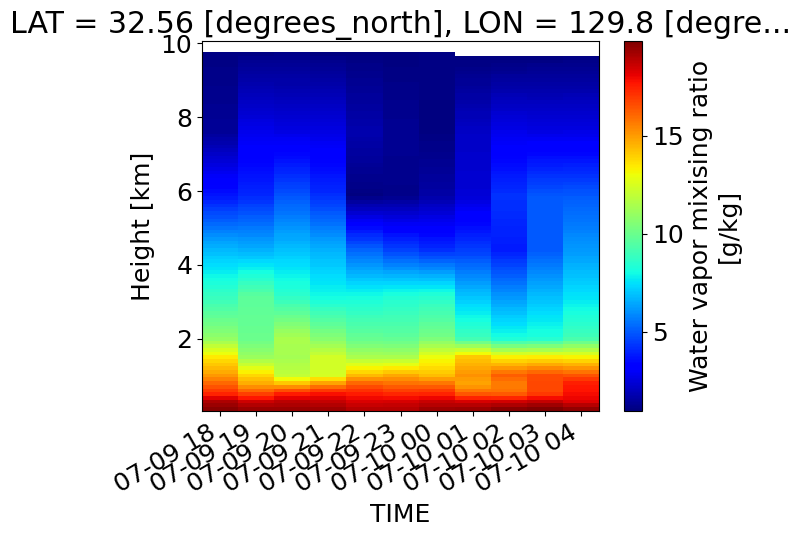

In [98]:
qv2.transpose("LEV", "TIME").plot(cmap=cmap)

fig_qv_z_Na.png


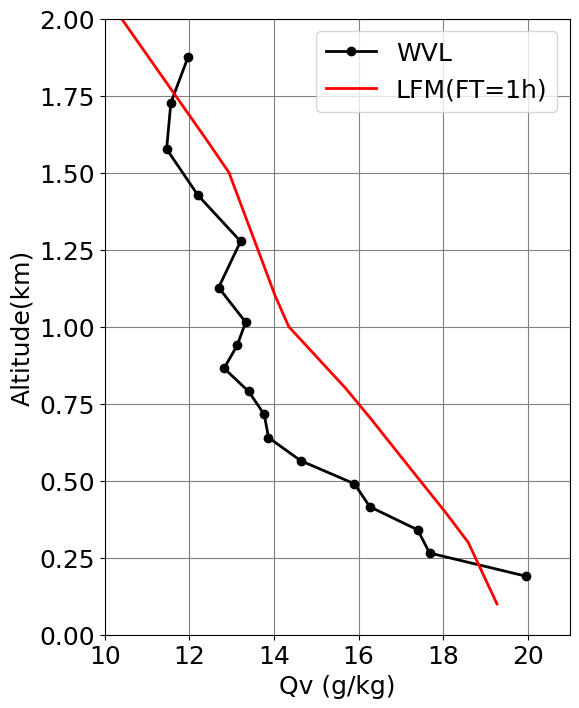

In [99]:
#---図の設定-------------
fs = 18
plt.rcParams["font.size"]   = fs
#plt.rcParams["font.family"] = "fontname"

#---プロット領域の作成-----------
#fig = plt.figure()
#fig = plt.figure(figsize=(4,6))
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(1, 1, 1)

#---lineを描く-------------------
# ax を使わない場合
#qv_cut.plot.line(y="LEV", aspect=0.75, size=8, color='black', marker='o')

# ax を使う場合
#  * ax を定義しておけば、軸が異なるxarrayでも適切にプロットできる
qv1.sel(TIME=slice(t1, t2)).sel(LEV=slice(zmin, zmax)).plot.line(ax=ax, y="LEV", color='black', marker='o', lw=2, label="WVL")
qv2.sel(TIME=slice(t1, t2_lfm)).sel(LEV=slice(zmin, zmax)).plot.line(ax=ax, y="LEV", color='r', lw=2, ls='-', label="LFM(FT=1h)")#, marker='x')
#qv0.sel(LEV=slice(zmin, zmax)).plot.line(ax=ax, y="LEV", color='r', lw=3, ls=':', label="LFM(FT=0h)")#, marker='x')

# 凡例の設定
ax.legend()

#plt.title("LFM (FT="+str(it)+"h)")
plt.title("")

plt.ylabel("Altitude(km)")
plt.xlabel("Qv (g/kg)")
plt.grid(which='major',color='gray',linestyle='-')
#plt.grid(which='minor',color='gray',linestyle='-')
#linewidth = 1, label = "linewidth = 1"
#ax.set_xlim([5,21])
#ax.set_xlim([0,21])
ax.set_xlim([10,21])
#ax.set_xlim([13,22])
ax.set_ylim([zmin,zmax])

#------------------------------------
# 図のファイルへの書き出し
#from pathlib import Path
#exe = Path().resolve().split(".")[0] #.replace("draw", "")
#exe = os.path.basename(__file__).split(".")[0] #.replace("draw", "")
fig_name = "fig_qv_z_"+lidar+".png"
#fig_name = "fig_" + exe + ".png"
print(fig_name)
plt.savefig(fig_name, dpi=300, bbox_inches='tight')
plt.show()
#qv1

In [100]:
xr1


<xarray.Dataset>
Dimensions:  (TIME: 37, LEV: 71)
Coordinates:
  * TIME     (TIME) datetime64[ns] 2021-07-09T18:07:30 ... 2021-07-10T03:07:30
  * LEV      (LEV) float64 0.1904 0.2653 0.3403 0.4152 ... 9.521 9.671 9.821
Data variables:
    QV       (TIME, LEV) float64 ...

fig_4v-lfm_multi_qv_z-t.png


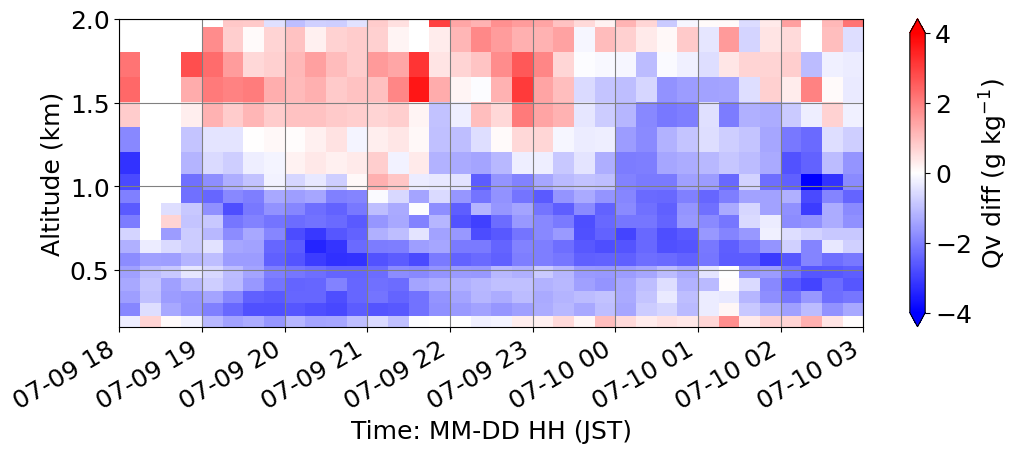

In [101]:
#---図の設定-------------
fs = 18
plt.rcParams["font.size"]   = fs
#plt.rcParams["font.family"] = "fontname"
cmap = 'jet'
cmap = 'RdBu'
cmap = 'bwr'
#cmap = 'RdYlBu'

#---プロット領域の作成-----------
xx=12; yy=4
fig = plt.figure(figsize=(xx,yy))
ax = fig.add_subplot(1, 1, 1)

#---シェードを描く----------------------
vmin = -4; vmax = 4; levels = int(vmax - vmin) + 1
#label = 'Water vapor mixing ratio (g kg$^{-1}$)'
label = 'Qv diff (g kg$^{-1}$)'
#qv_diff.transpose("LEV", "TIME").plot(ax=ax,vmin=vmin, vmax=vmax, cmap=cmap, levels=levels,cbar_kwargs={'label':label})
qv_diff.transpose("LEV", "TIME").plot(ax=ax,vmin=vmin, vmax=vmax, cmap=cmap,cbar_kwargs={'label':label})

#vmin2 = 0; vmax2 = 5
#np.log10(PZ).transpose("LEV", "TIME").plot(ax=ax,vmin=vmin2, vmax=vmax2, cmap=cmap, levels=levels)

#----タイトル・ラベル等の設定
#plt.title("WVL ("+lidar+")")
plt.title("")
plt.ylabel("Altitude (km)")
plt.xlabel("Time: MM-DD HH (JST)")
plt.grid(which='major',color='gray',linestyle='-')

#----可視化範囲を陽に設定
t1 = "2021-07-09T1800"; t2 = "2021-07-10T0300"
tt1 = pd.to_datetime(t1)
tt2 = pd.to_datetime(t2)
ax.set_xlim([tt1,tt2])
zmin = 0.1625; zmax = 2
#zmin = 0.1625; zmax = 4
#zmin = 0; zmax = 2
ax.set_ylim([zmin,zmax])

#------------------------------------
# 図のファイルへの書き出し
#from pathlib import Path
#exe = Path().resolve().split(".")[0] #.replace("draw", "")
#exe = os.path.basename(__file__).split(".")[0] #.replace("draw", "")
fig_name = "fig_4v-lfm_multi_qv_z-t.png"
#fig_name = "fig_" + exe + ".png"
print(fig_name)
plt.savefig(fig_name, dpi=300, bbox_inches='tight')
plt.show()



(array([  1.,  32., 154., 165., 112.,  83.,  63.,  21.,   7.,   3.]),
 array([-4.29801382, -3.50444811, -2.71088239, -1.91731668, -1.12375096,
        -0.33018525,  0.46338047,  1.25694619,  2.0505119 ,  2.84407762,
         3.63764333]),
 <BarContainer object of 10 artists>)

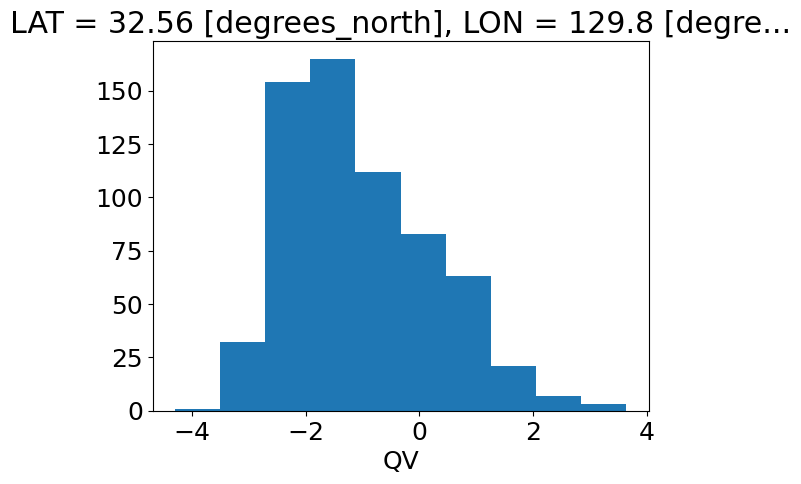

In [102]:
qv_diff.sel(LEV=slice(zmin, zmax)).plot.hist()